# Probabilistic Programming & Bayesian Methods for Hackers
http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/



## Frequently used characters
(for copying and pasting)

| symbol | definition |
|--------|------------|
| ∼ | not (or has) |
| α | alpha |
| β | beta |

In [1]:
%%html
<style>
table {float:left}
</style>

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chapter 1 - Introduction

Bayesian methods often work better than frequentist methods for smaller sample sizes:
> Denote $N$ as the number of instances of evidence we possess. As we gather an infinite amount of evidence, say as $N→∞$, our Bayesian results (often) align with frequentist results. Hence for large $N$, statistical inference is more or less objective. On the other hand, for small $N$, inference is much more unstable: frequentist estimates have more variance and larger confidence intervals. This is where Bayesian analysis excels. By introducing a prior, and returning probabilities (instead of a scalar estimate), we preserve the uncertainty that reflects the instability of statistical inference of a small $N$ dataset.


**Prior**: a belief about an event $A$ formed by previous information.    
**Posterior**: An update/modification to our prior formed with new information.    

Bayes' Theorem:
$$ P(A|X) = \frac{P(X|A)P(A)}{P(X)} $$

with Prior Probability being $P(A)$ and Posterior Probability being $P(A|X)$.

Posterior probabilities of a fair coin toss after varying amounts of tosses (skip code; look at graphs):

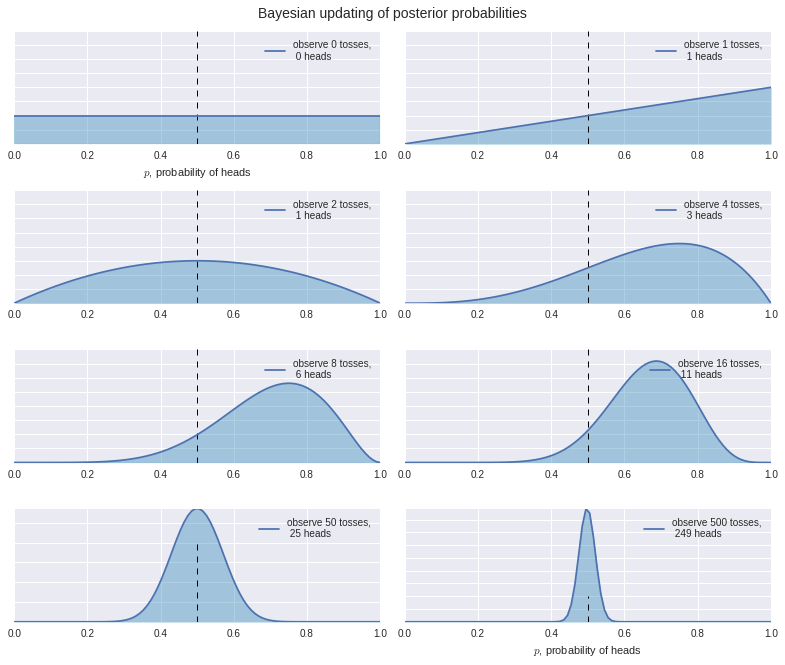

In [11]:
from IPython.core.pylabtools import figsize

figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 4, 8, 16, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### Probability Distributions

> Let $Z$ be some random variable. Then associated with $Z$ is a **probability distribution function (pdf)** that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve.

Random variables (e.g., $Z$) can be classified as one of:
1. Discrete: the outcome must be a discrete value (movie ratings, populations, etc.)
2. Continuous: the outcome may take on a range of values (temperature, speed, etc.)
3. Mixed: a combination of 1. and 2.

### Discrete Random Variables

If $Z$ is discrete, its distribution is called a **probability mass function (pmf)**, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$.

For example, we say $Z$ is Poisson distributed if:
$$ P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$λ$  is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $λ$ can be any positive number. By increasing $λ$, we add more probability to larger values, and conversely by decreasing $λ$ we add more probability to smaller values. One can describe $λ$ as the intensity of the Poisson distribution.

If a random variable $Z$ has a Poisson mass distribution, we denote this by writing
$$ Z∼Poi(λ) $$

Poisson distributions of 2 different $λ$ values:

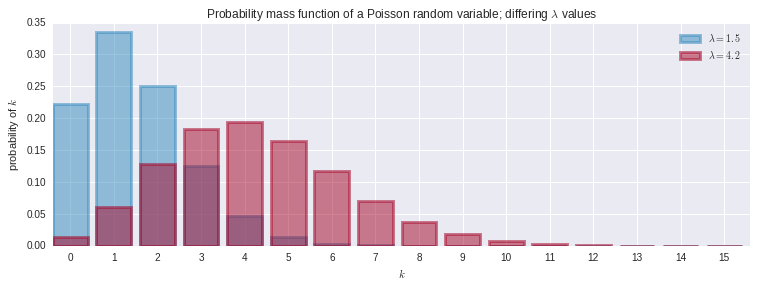

In [13]:
figsize(12.5, 4)

a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.50,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.50,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

### Continuous Random Variables

If $Z$ is continuous, its distribution is called a **probability density function (pdf)**.

An example of continuous random variable is a random variable with **exponential density**. The density function for an exponential random variable looks like this:
$$ f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0 $$

When a random variable $Z$ has an exponential distribution with parameter $λ$, we say $Z$ is exponential and write
$$ Z∼Exp(λ) $$

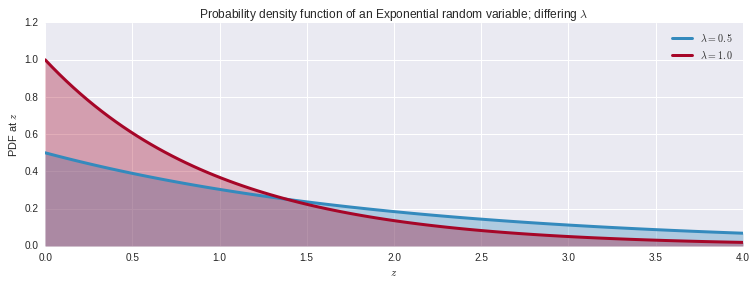

In [14]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

### But what is $λ$?

> Bayesian inference is concerned with beliefs about what $λ$ might be. Rather than try to guess $λ$ exactly, we can only talk about what $λ$ is likely to be by assigning a probability distribution to $λ$.

### Example: Inferring behaviour from text-message data

> You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this? (This is in fact my own text-message data. Judge my popularity as you wish.)

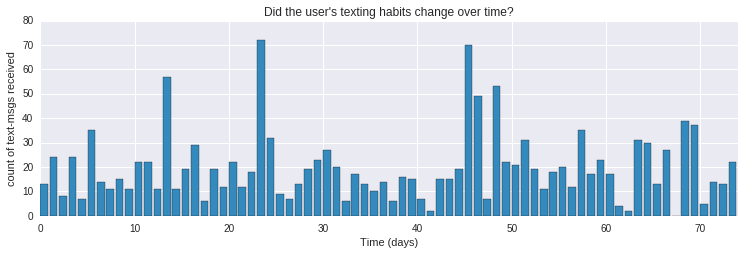

In [16]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);